# Comparing results between bw2 and our own code without separating use and construction

In [1]:
import pandas as pd
import numpy as np

In [65]:
wind_bw = pd.read_csv("../ES_MOO_validation/AB_results/WT-2-MW_LCIA-results.csv")

In [78]:
from func import *

In [76]:
# Results from ecos_sep_constr_use
R_long_tot_constr = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_constr.csv")
R_long_tot_use = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_use.csv")
midpoint_categories, endpoint_categories_HH, endpoint_categories_EQ = impact_categories(R_constr=R_long_tot_constr, R_use=R_long_tot_use)

In [2]:
run pickle_reader_function.py

In [3]:
eco = read_pickle_file(r'C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\dataframes\ecospold2matrix\ecoinvent3.8.cut-offPandas_symmNorm.gz.pickle')

In [4]:
eco_A = eco['A']
eco_A = eco_A.fillna(0)
display(eco_A)

index,b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,b8a3ca13-9b30-4971-9809-bfe00449eb49_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,447b52c3-fb20-495c-ade2-2b79c8ac130e_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,2565980c-9db0-480c-85c2-08a51f35390f_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,e5760adb-d2f0-4baa-a85a-2b8473ebaf3d_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,dfa5f12d-7f3c-4b98-ae94-cc56c6f70d89_a235b2ff-3237-44b0-a445-b852376a1939,dfa5f12d-7f3c-4b98-ae94-cc56c6f70d89_d7f544d6-c372-4fc3-81ae-44aa3614c9fc,af76617f-978e-426e-a13e-d38e599dcc80_a235b2ff-3237-44b0-a445-b852376a1939,af76617f-978e-426e-a13e-d38e599dcc80_d7f544d6-c372-4fc3-81ae-44aa3614c9fc,ab75880b-d311-45dc-ac14-a5776aced382_692b4f7e-9e79-4f69-b22f-b66f68f2f9cc,...,a8384a9d-660e-4b3c-95bf-278505b53fd3_fd27af60-7b68-4549-bf35-022eacd74f93,9210586d-b63c-4cd2-8539-81365d226883_ad38bbd2-e41c-4509-9dc3-c5c708a36606,95c3d53f-defc-4107-947d-244c9a6d57ec_2cb0d6c6-349c-46fc-b31f-a036c847a267,05c331cc-e200-4380-9d0a-d2cce6edb706_ce165995-6d94-44a8-ac3b-d5860c2c7fdb,b6c373ca-6cc9-409e-880f-5860dd1c0961_b3184435-d00c-5713-823d-5ff6741bfbbc,310fd9fe-8ad2-4be7-90fa-f8a784920210_d13ae29b-7d6a-55d2-8380-86343a80fed8,e55ecdcd-1c17-4ef3-9012-79de81a33742_ed25f589-c6c8-56a7-a518-b01dd3e8a453,b9b49ac3-e5df-4570-b274-714780d5467a_101e55f2-2da0-528b-96fd-21687e242c1c,b8f99db9-d2b9-44de-aad5-e6c6ea8ab784_451550a8-d9e6-4396-9f9a-97e752111228,789596da-02d0-4d28-8901-8736aa1bb122_5d15df3e-fa54-45d5-85c6-5e3f5b89b20e
index,,,,,,,,,,,,,,,,,,,,,
b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b8a3ca13-9b30-4971-9809-bfe00449eb49_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447b52c3-fb20-495c-ade2-2b79c8ac130e_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565980c-9db0-480c-85c2-08a51f35390f_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e5760adb-d2f0-4baa-a85a-2b8473ebaf3d_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310fd9fe-8ad2-4be7-90fa-f8a784920210_d13ae29b-7d6a-55d2-8380-86343a80fed8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e55ecdcd-1c17-4ef3-9012-79de81a33742_ed25f589-c6c8-56a7-a518-b01dd3e8a453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b9b49ac3-e5df-4570-b274-714780d5467a_101e55f2-2da0-528b-96fd-21687e242c1c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
I = np.identity(len(eco['A']))
A_full =  I - eco_A

In [45]:
C_IW = pd.read_excel(r'C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\dataframes\impact_world_plus_2.0_ecoinvent_v38.xlsx')
Impact_cat = C_IW['Impact category']
C_IW = C_IW.set_index(['Impact category','CF unit'])

In [7]:
df_eco_pro = pd.DataFrame.from_dict(eco['PRO'])
df_eco_pro = df_eco_pro[['activityName','geography','unitName']]

F_full = eco['F']
F_full = F_full.fillna(0)

df_eco_str = pd.DataFrame.from_dict(eco['STR'])
df_eco_str = df_eco_str[['id','name','comp','subcomp','unit']]

In [8]:
import time
start_time = time.time()
A_full_inv = pd.DataFrame.from_dict(np.linalg.inv(A_full))
#det = np.linalg.det(A_full_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 199.3025026321411 seconds ---


In [9]:
UUID_product_list = list(A_full.head(len(A_full)).index)

A_full_inv.columns = UUID_product_list
A_full_inv.index = UUID_product_list

In [10]:
import time
start_time = time.time()
Em = F_full.dot(A_full_inv)
print("--- %s seconds ---" % (time.time() - start_time))

--- 33.886781215667725 seconds ---


In [29]:
R = C_IW.dot(Em)
display(R)

b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8  \
Impact category                               CF unit                                                                                            
Climate change, ecosystem quality, long term  PDF.m2.yr                                                   2.128415e-01                           
Climate change, ecosystem quality, short term PDF.m2.yr                                                   8.979267e-02                           
Climate change, human health, long term       DALY                                                        9.673072e-07                           
Climate change, human health, short term      DALY                                                        4.156155e-07                           
Climate change, long term                     kg CO2 eq (long)                                            4.937458e-01                           
Climate change, short term                    kg CO2 eq (short)                                           5.079247e-01                           
Fossil and nuclear energy use                 MJ deprived                                                 1.989168e+01                           
Freshwater acidification                      PDF.m2.yr                                                   5.561403e-03                           
                                              kg SO2 eq                                                   6.494032e-09                           
Freshwater ecotoxicity                        CTUe                                                        4.706390e+01                           
Freshwater ecotoxicity, long term             PDF.m2.yr                                                   1.913029e-02                           
Freshwater ecotoxicity, short term            PDF.m2.yr                                                   6.563356e-03                           
Freshwater eutrophication                     PDF.m2.yr                                                   5.087892e-04                           
                                              kg PO4 P-lim eq                                             4.463063e-05                           
Human toxicity cancer                         CTUh                                                        7.825532e-09                           
Human toxicity cancer, long term              DALY                                                        4.325135e-09                           
Human toxicity cancer, short term             DALY                                                        8.566849e-08                           
Human toxicity non-cancer                     CTUh                                                        3.248024e-07                           
Human toxicity non-cancer, long term          DALY                                                        1.638714e-07                           
Human toxicity non-cancer, short term         DALY                                                        7.130951e-07                           
Ionizing radiation, ecosystem quality         PDF.m2.yr                                                   2.038631e-10                           
Ionizing radiation, human health              DALY                                                        3.616927e-10                           
Ionizing radiations                           Bq C-14 eq                                                  1.723503e+00                           
Land occupation, biodiversity                 PDF.m2.yr                                                   1.184675e+00                           
                                              m2 arable land eq .yr                                       1.800121e+00                           
Land transformation, biodiversity             PDF.m2.yr                                                   5.856103e+02         

In [70]:
wind_id = df_eco_pro[df_eco_pro.activityName == "wind turbine construction, 2MW, onshore"].index[0]
wind_impacts = pd.DataFrame(R[wind_id])
display(wind_impacts)

e8c67e95-01b4-4064-8d10-9d55f0eede8e_1692f537-b2ad-4143-bea3-226fc2fe9cf5
Impact category                               CF unit                                                                                         
Climate change, ecosystem quality, long term  PDF.m2.yr                                                   6.887189e+05                        
Climate change, ecosystem quality, short term PDF.m2.yr                                                   2.149146e+05                        
Climate change, human health, long term       DALY                                                        3.135282e+00                        
Climate change, human health, short term      DALY                                                        9.932483e-01                        
Climate change, long term                     kg CO2 eq (long)                                            1.138364e+06                        
Climate change, short term                    kg CO2 eq (short)                                           1.214465e+06                        
Fossil and nuclear energy use                 MJ deprived                                                 1.754518e+07                        
Freshwater acidification                      PDF.m2.yr                                                   1.144241e+04                        
                                              kg SO2 eq                                                   1.400323e-02                        
Freshwater ecotoxicity                        CTUe                                                        4.270514e+08                        
Freshwater ecotoxicity, long term             PDF.m2.yr                                                   1.963201e+05                        
Freshwater ecotoxicity, short term            PDF.m2.yr                                                   4.179532e+04                        
Freshwater eutrophication                     PDF.m2.yr                                                   2.482410e+02                        
                                              kg PO4 P-lim eq                                             2.177553e+01                        
Human toxicity cancer                         CTUh                                                        2.881818e-01                        
Human toxicity cancer, long term              DALY                                                        2.049986e-02                        
Human toxicity cancer, short term             DALY                                                        3.293591e+00                        
Human toxicity non-cancer                     CTUh                                                        3.224664e-01                        
Human toxicity non-cancer, long term          DALY                                                        6.442295e-01                        
Human toxicity non-cancer, short term         DALY                                                        2.264297e-01                        
Ionizing radiation, ecosystem quality         PDF.m2.yr                                                   8.897313e-04                        
Ionizing radiation, human health              DALY                                                        1.909723e-03                        
Ionizing radiations                           Bq C-14 eq                                                  9.102283e+06                        
Land occupation, biodiversity                 PDF.m2.yr                                                   4.613133e+04                        
                                              m2 arable land eq .yr                                       7.009682e+04                        
Land transformation, biodiversity             PDF.m2.yr                                                   4.624109e+05                        
                                              m2 arable land eq  

In [71]:
wind_impacts.reset_index(drop=False, inplace=True)
wind_impacts.rename({wind_id:"es_moo"}, inplace=True, axis=1)
display(wind_impacts)

,Impact category,CF unit,es_moo
0,"Climate change, ecosystem quality, long term",PDF.m2.yr,6.887189e+05
1,"Climate change, ecosystem quality, short term",PDF.m2.yr,2.149146e+05
2,"Climate change, human health, long term",DALY,3.135282e+00
3,"Climate change, human health, short term",DALY,9.932483e-01
4,"Climate change, long term",kg CO2 eq (long),1.138364e+06
5,"Climate change, short term",kg CO2 eq (short),1.214465e+06
6,Fossil and nuclear energy use,MJ deprived,1.754518e+07
7,Freshwater acidification,PDF.m2.yr,1.144241e+04
8,Freshwater acidification,kg SO2 eq,1.400323e-02
9,Freshwater ecotoxicity,CTUe,4.270514e+08


In [72]:
method_midpoint = "IMPACT World+ Midpoint 2.0 | Midpoint | "
L = []
for impact in midpoint_categories:
    L.append(wind_bw[f"{method_midpoint}{impact}"].iloc[0])
wind_impacts_midpoints = wind_impacts.drop(wind_impacts[wind_impacts["CF unit"].str.contains("PDF.m2.yr") | wind_impacts["CF unit"].str.contains("DALY")].index)
wind_impacts_midpoints["brightway"] = L
wind_impacts_midpoints["delta"] = (wind_impacts_midpoints.brightway - wind_impacts_midpoints.es_moo) / wind_impacts_midpoints.brightway

In [73]:
display(wind_impacts_midpoints)

,Impact category,CF unit,es_moo,brightway,delta
4,"Climate change, long term",kg CO2 eq (long),1.138364e+06,1.138372e+06,7.372421e-06
5,"Climate change, short term",kg CO2 eq (short),1.214465e+06,1.214656e+06,1.576785e-04
6,Fossil and nuclear energy use,MJ deprived,1.754518e+07,1.638816e+07,-7.060095e-02
8,Freshwater acidification,kg SO2 eq,1.400323e-02,4.969332e+03,9.999972e-01
9,Freshwater ecotoxicity,CTUe,4.270514e+08,4.413324e+08,3.235892e-02
13,Freshwater eutrophication,kg PO4 P-lim eq,2.177553e+01,6.851500e+01,6.821787e-01
14,Human toxicity cancer,CTUh,2.881818e-01,2.893065e-01,3.887302e-03
17,Human toxicity non-cancer,CTUh,3.224664e-01,3.982054e-01,1.902009e-01
22,Ionizing radiations,Bq C-14 eq,9.102283e+06,8.949646e+06,-1.705502e-02
24,"Land occupation, biodiversity",m2 arable land eq .yr,7.009682e+04,7.009682e+04,-1.256699e-08


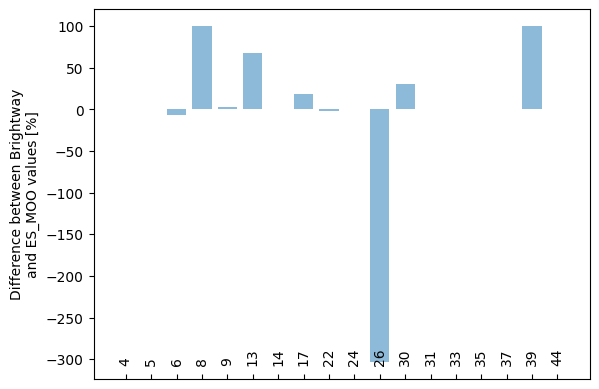

In [79]:
plot_comparison(wind_impacts_midpoints, save=False)